In [26]:
import torch
import torchvision.transforms as transforms # MNIST 데이터를 텐서 형태로 바꾸기 위해
import torch.nn.init

device = None
if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# 랜덤 시드 고정
torch.cuda.manual_seed_all(777)

# 현재 디바이스가 무엇인지?
print('Current Device : ' + str(device))

Current Device : mps


In [27]:
import os
import torchvision.datasets as dsets # 이 안에 MNIST 있다

if os.path.exists('MNIST'):
    mnist_train = dsets.MNIST(root=str(os.getcwd()), train=True, transform=transforms.ToTensor(), download=False)
    mnist_test = dsets.MNIST(root=str(os.getcwd()), train=False, transform=transforms.ToTensor(), download=False)
else: # MNIST 데이터 다운로드
    mnist_train = dsets.MNIST(root=str(os.getcwd()), train=True, transform=transforms.ToTensor(), download=True)
    mnist_test = dsets.MNIST(root=str(os.getcwd()), train=False, transform=transforms.ToTensor(), download=True)

print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/leejunseo/NODE
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/leejunseo/NODE
    Split: Test
    StandardTransform
Transform: ToTensor()


In [28]:
BATCH_SIZE = 100
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

In [29]:
from torchinfo import summary

class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(784, 32)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(32,10)
        self.softmax = torch.nn.Softmax(dim=1)
    def forward(self, input):
        temp = self.flatten(input)
        temp = self.fc1(temp)
        temp = self.relu(temp)
        temp = self.fc2(temp)
        output = self.softmax(temp)
        return output
    
model = MLP()
model.to(device)
# summary(model, (100,1,28,28))

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [30]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# 학습
EPOCH = 10
LR = 1e-3
train_loss_arr = []
test_loss_arr = []

loss_func = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

for epoch in range(EPOCH):
    model.train()
    with tqdm(total=len(train_loader), desc='Train') as pbar:
        for x,y in train_loader:
            train_output = model(x.to(device))
            optimizer.zero_grad()
            train_loss = loss_func(train_output, y.to(device))
            train_loss.backward()
            optimizer.step()
            pbar.update(1)
            train_loss_arr.append(train_loss.cpu().item())
    model.eval()
    with torch.no_grad():
        with tqdm(total=len(test_loader), desc='Evaluation') as pbar:
            for x,y in test_loader:
                test_output = model(x.to(device))
                test_loss = loss_func(test_output, y.to(device))
                pbar.update(1)
                test_loss_arr.append(test_loss.cpu().item())
    print("Epoch:%d, Loss:%1.8f, Valid_Loss:%1.8f" %(epoch, train_loss.cpu().item(), test_loss.cpu().item()))


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 115.17it/s]


Epoch:0, Loss:1.82494056, Valid_Loss:1.81229830


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 112.81it/s]


Epoch:1, Loss:1.67724848, Valid_Loss:1.66740692


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 114.55it/s]


Epoch:2, Loss:1.64943480, Valid_Loss:1.65551245


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 111.29it/s]


Epoch:3, Loss:1.61205184, Valid_Loss:1.65638518


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 115.77it/s]


Epoch:4, Loss:1.56648862, Valid_Loss:1.58579588


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 106.72it/s]


Epoch:5, Loss:1.60010159, Valid_Loss:1.54609191


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 115.79it/s]


Epoch:6, Loss:1.59913814, Valid_Loss:1.57488227


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 110.27it/s]


Epoch:7, Loss:1.59974885, Valid_Loss:1.59914100


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 113.58it/s]


Epoch:8, Loss:1.55272949, Valid_Loss:1.57194543


Evaluation: 100%|██████████| 100/100 [00:00<00:00, 109.03it/s]

Epoch:9, Loss:1.55702591, Valid_Loss:1.57906950


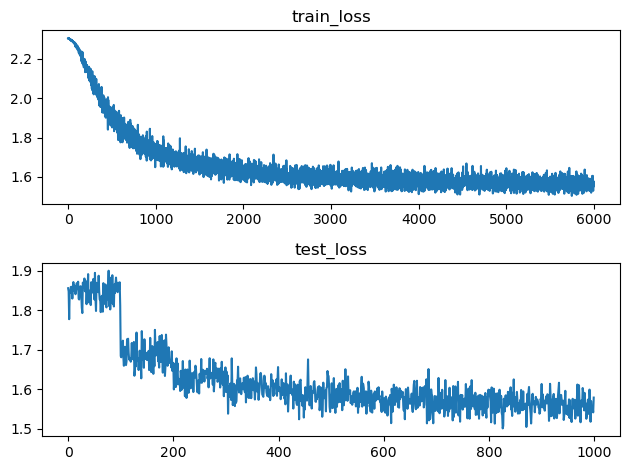

In [56]:
plt.subplot(2,1,1)
plt.plot(range(len(train_loss_arr)), train_loss_arr)
plt.title('train_loss')
plt.subplot(2,1,2)
plt.plot(range(len(test_loss_arr)), test_loss_arr)
plt.title('test_loss')
plt.tight_layout()
plt.show()

In [55]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

x = mnist_test.__getitem__(2)[0].to(device)
y = mnist_test.__getitem__(2)[1]


o = model(x).cpu().view(-1).tolist()
print(o.index(max(o)), y)



1 1
